In [1]:
import spkit as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import mne
from copy import deepcopy
from mne.preprocessing import compute_proj_ecg
from mne_connectivity import envelope_correlation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import random
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs
from autoreject import AutoReject
from autoreject import get_rejection_threshold
from autoreject import Ransac
from mne.preprocessing import annotate_amplitude

In [2]:
#mne.set_config("MNE_USE_CUDA", True)
#print(mne.get_config("MNE_USE_CUDA"))
print(mne.get_config("MNE_USE_CUDA"))

True


In [3]:
data = np.array(pd.read_csv("D:\Clean Data\IGE\shirband\samples.csv", skiprows=2))
data = np.delete(data, [0, 1, -1, -3, -4], axis=1)

In [4]:
#ch_name = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'A1', 'A2', 'Fz', 'Cz', 'Pz', 'T2', 'T1', 'ECG']
channel_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'A1', 'A2', 'Fz', 'Cz', 'Pz', 'ECG']
#ch_name = ['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'A1', 'A2', 'Fz', 'Cz', 'Pz', 'T2', 'T1']
np.shape(channel_names)

(22,)

In [5]:
np.shape(data)

(1815746, 22)

In [6]:
X = deepcopy(data)
X = deepcopy(X[1000:-1000])

In [7]:
sfreq = 300
info = mne.create_info(channel_names, sfreq, ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'ecg'])
raw = mne.io.RawArray(X.T, info)
raw.set_montage('standard_1020')

Creating RawArray with float64 data, n_channels=22, n_times=1813746
    Range : 0 ... 1813745 =      0.000 ...  6045.817 secs
Ready.


<RawArray | 22 x 1813746 (6045.8 s), ~304.5 MB, data loaded>

Fitting ICA to data using 21 channels (please be patient, this may take a while)


C:\Users\admin\AppData\Local\Temp\ipykernel_10456\1628914859.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.


Selecting by number: 21 components
Fitting ICA took 32.8s.
Fraction of eeg variance explained by all components: 1.0
Creating RawArray with float64 data, n_channels=22, n_times=1813746
    Range : 0 ... 1813745 =      0.000 ...  6045.817 secs
Ready.
Using matplotlib as 2D backend.


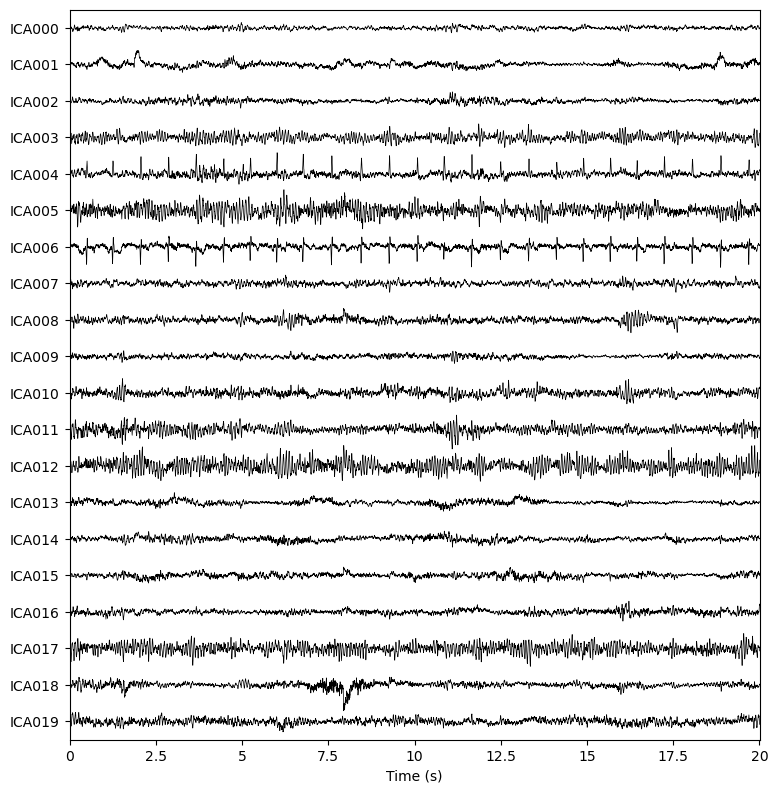

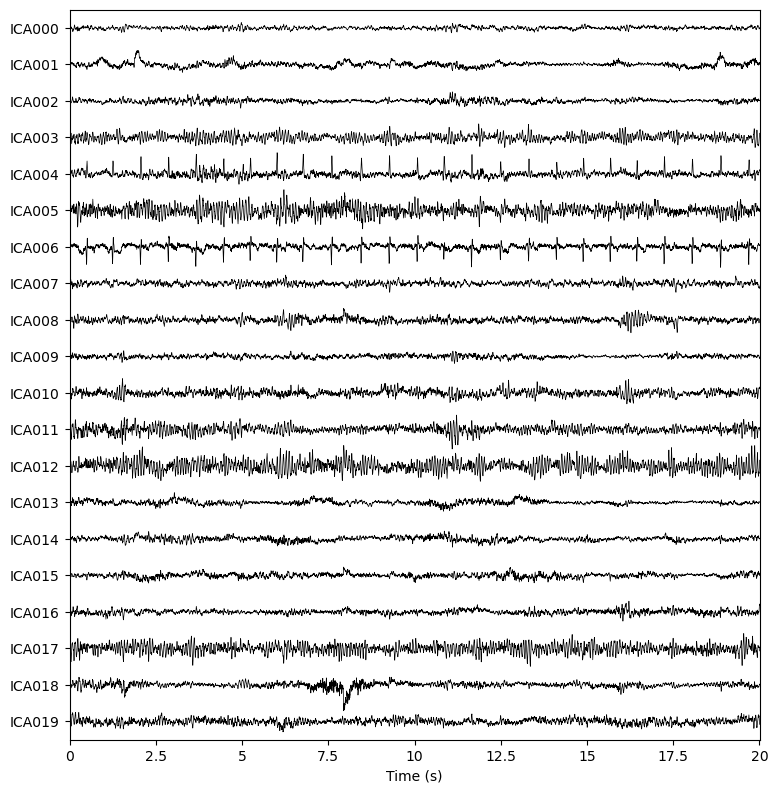

In [8]:
ica = ICA(n_components=21, max_iter="auto", random_state=97)
ica.fit(raw)

explained_var_ratio = ica.get_explained_variance_ratio(raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )

raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

In [9]:
"""
n_max_ecg = 3  # use max 3 components
ecg_epochs = create_ecg_epochs(raw, tmin=-.3, tmax=.3)
#ecg_epochs.decimate(5).apply_baseline((None, None))
ecg_inds, scores_ecg = ica.find_bads_ecg(ecg_epochs, method='ctps')
print('Found %d ECG component(s)' % (len(ecg_inds),))
ica.exclude += ecg_inds[:n_max_ecg]
ica.plot_scores(scores_ecg, exclude=ecg_inds, title='ECG scores')
"""

"\nn_max_ecg = 3  # use max 3 components\necg_epochs = create_ecg_epochs(raw, tmin=-.3, tmax=.3)\n#ecg_epochs.decimate(5).apply_baseline((None, None))\necg_inds, scores_ecg = ica.find_bads_ecg(ecg_epochs, method='ctps')\nprint('Found %d ECG component(s)' % (len(ecg_inds),))\nica.exclude += ecg_inds[:n_max_ecg]\nica.plot_scores(scores_ecg, exclude=ecg_inds, title='ECG scores')\n"

In [10]:
#ica.apply(raw, exclude=ica.exclude)

In [44]:
bad_segments = annotate_amplitude(raw, peak=50, flat=0.1, min_duration=0.0033)

Finding segments below or above PTP threshold.


In [46]:
raw.set_annotations(bad_segments[0])

<RawArray | 22 x 1813746 (6045.8 s), ~304.5 MB, data loaded>